In [1]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import copy

In [2]:
graph_type = "barabasi_albert_graph"
num_nodes = 2000
influencers_cascade_steps = 3
num_influencers = 20
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  # Different values of k to test
general_cascade_steps = 3
num_avg_runs = 5

In [3]:
G = nx.barabasi_albert_graph(num_nodes, 2)
model = ef.run_influence_cascade(G, num_influencers=num_influencers, steps=influencers_cascade_steps, selection_method='random')
num_edges = G.number_of_edges()

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 746
Number of deinfluenced nodes: 0
Number of susceptible nodes: 1254
influencer {1156, 783, 1189, 1959, 1703, 43, 942, 1465, 1598, 1855, 962, 591, 86, 1367, 88, 220, 1394, 1012, 1142, 892}


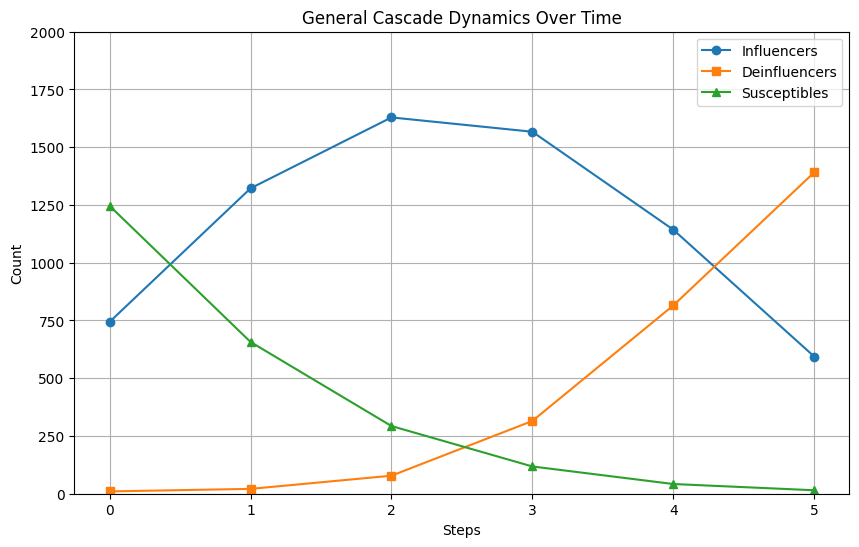

In [4]:
# Run the cascade and record the results
influencer_counts, deinfluencer_counts, susceptible_counts = ef.run_cascade_with_recording(model_fixed_influencers, num_deinfluencers=10, steps = 5)

# Plot the results
ef.plot_cascade_results_set(influencer_counts, deinfluencer_counts, susceptible_counts)